In [1]:
%pip install numpy matplotlib tensorflow scikit-learn


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy

2026-02-09 19:35:19.606589: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-09 19:35:19.887751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-09 19:35:21.619189: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Dataset

The dataset selected was **cifar10**, this allow us to classify different kind of things in a range of 0 to 9:

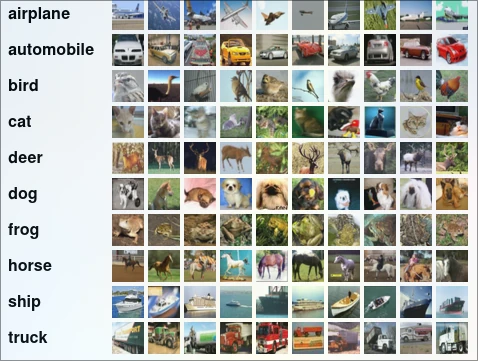

This is appropied to the **convolutional neural network**, because show how a model learn and can differenciate from a **automobile** to a **frog**. 

Similarly it is interesting cause the dataset is with colors, that makes we need to normalize and add parameter to the size of images (**32 x 32 pixels x 3**).

https://keras.io/api/datasets/cifar10/

## 1. Dataset Exploration (EDA)

In [3]:
(train_X, train_Y),(test_X, test_Y) = cifar10.load_data()

/home/tulio/.pyenv/versions/3.13.9/lib/python3.13/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


## 1.1 Dataset Size - 1.2. Image Dimensions and channels

Cifar10 is a dataset of **50,000 color training images** and **10,000 test images,** labeled over **10 categories**.

The dataset is divided into five training batches and one test batch, each with 10,000 images. 

The test batch contains exactly 1,000 randomly-selected images from each class.

The training batches contain the remaining images in random order, but some training batches may contain more images from one class to another. Between them, the training batches contain exactly 5,000 images from each class.

The classes are completely mutually exclusive. There is no overlap between **automobiles** and **trucks**. "Automobile" includes **sedans**, **SUVs**, things of that sort.

**Truck** includes only big trucks. Neither includes pickup trucks.

The image dimensions are **32 x 32 pixels**

The channels are **RGB** because are color images, so we need to multiply the dimensions for the respective channels, in this case (**3**).

In [4]:
print('Training Data Shape', train_X.shape, train_Y.shape)
print('Test Data Shape', test_X.shape, test_Y.shape)

Training Data Shape (50000, 32, 32, 3) (50000, 1)
Test Data Shape (10000, 32, 32, 3) (10000, 1)


We can observe, how it is distribuited the respective classes, where we have a 10 **output possibilities**.

In [5]:
classes = np.unique(train_Y)
nClasses = len(classes)

print('Output possibilities', classes)
print('Total of classes', nClasses)

Output possibilities [0 1 2 3 4 5 6 7 8 9]
Total of classes 10


## 1.3 Examples of samples per class

Similarly, through matplot we can visualize some images and see what label has.

Text(0.5, 1.0, 'Ground Truth: [8]')

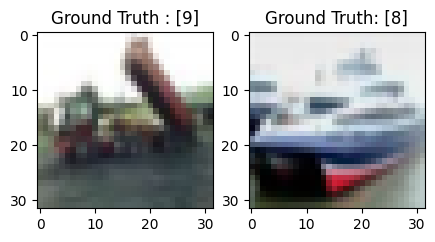

In [6]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[2,:,:])
plt.title("Ground Truth : {}".format(train_Y[2]))

plt.subplot(122)
plt.imshow(test_X[1,:,:])
plt.title("Ground Truth: {}".format(test_Y[1]))

## 1.4 Preprocessing Needed

In [7]:
train_X = train_X.reshape(-1, 32, 32, 3)
test_X = test_X.reshape(-1, 32, 32, 3)

Since we are dealing with pixels that can have values between 0 and 255, we can divide by the maximum to handle it with small values between 0 and 1.

In [8]:
train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)
train_X = train_X / 255
test_X = test_X / 255

Similarly, for labels, instead of representing them as a single number, we'll share them in vectors of size **n**, where **n** is the number of possible labels. This is because, in the final layer, we'll perform a product between vectors, facilitating classification. We can accomplish this using **to_categorical** function.

In [9]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original Label: ', train_Y[0])
print('One hot encoding',train_Y_one_hot[0])

Original Label:  [6]
One hot encoding [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Finally, we will use scikit-learn where we will split the dataset in both **training** and **validation**.

In [10]:
train_X_normalize, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=15)

train_X_normalize.shape,valid_X.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

## 2. Baseline Model (Non-Convolutional)

Implement a baseline neural network without convolutional layers, e.g.:

- Flatten + Dense layers

## 2.1 Build the Neural Network

We created the neural network where, through a first flattening layer, we will send all the pixels associated with the image without any kind of filter to the first layer where we will use the relu activation function and divide it accordingly, until we reach the last layer, which is a classification layer that has a possible output.


In [11]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/home/tulio/.pyenv/versions/3.13.9/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1770684209.321058  297379 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1770684209.329709  297379 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 828,490 (3.16 MB)

 Trainable params: 828,490 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

## 2.2 Compile the model

After this we will complete the model by defining the loss function and the optimizer in this case will be **Adam**, which will make constant adjustments to the learning rate.

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model

When training the model, we will define the number of times all the data will be reviewed and the way it will be done in batches to avoid only seeing specific data, that is, we are passing it random images.


In [13]:
model.fit(train_X_normalize, train_label, epochs=15, batch_size=32)

Epoch 1/15


2026-02-09 19:43:35.198623: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3094 - loss: 1.8998
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3778 - loss: 1.7262
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4107 - loss: 1.6347
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4320 - loss: 1.5809
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4484 - loss: 1.5426
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4556 - loss: 1.5130
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4701 - loss: 1.4805
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4752 - loss: 1.4578
Epoch 9/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4828 - loss: 1.4363
Epoch 10/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4907 - loss: 1.4143
Epoch 11/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4982 - loss: 1.3993
Epoch 12/15
1250/1250 ━━━━━━━━━━━━━━━━━━━

## Evaluate the model

In [14]:
loss, acc = model.evaluate(test_X, test_Y_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4934 - loss: 1.4411


By obtaining these values for the respective metrics, we can see that the model does not reliably conclude what type of image is acceptable.

This may be heavily influenced by the first layer we used, since we sent it the entire image with pixels that are not relevant.

## Predict on Test Images and Visualize Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


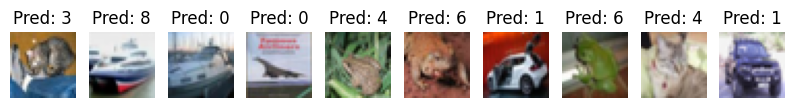

In [15]:
preds = model.predict(test_X[:10])
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(test_X[i])
    plt.title(f"Pred: {np.argmax(preds[i])}")
    plt.axis('off')
plt.show()

In [16]:
predicted_classes = model.predict(test_X)

predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

test_Y_Flatten = test_Y.flatten()

predicted_classes.shape, test_Y_Flatten.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


((10000,), (10000,))

Found 3677 correct labels


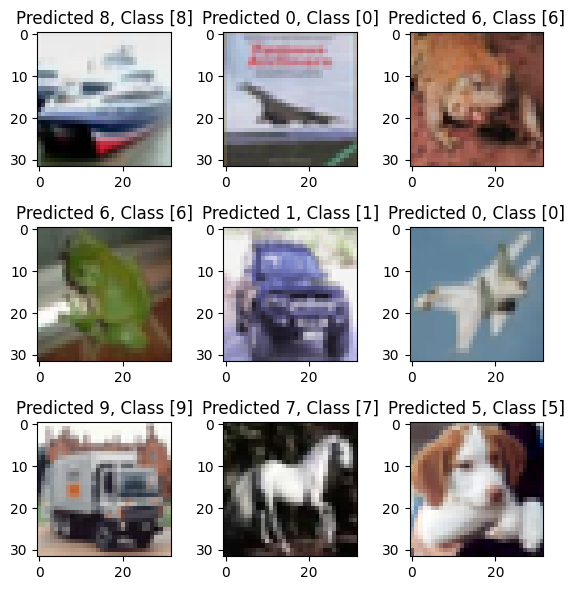

In [17]:
correct = np.where(predicted_classes==test_Y_Flatten)[0]
print("Found %d correct labels" %len(correct))
plt.figure(figsize=(6,6))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(32,32,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

By finding only **3,259** correct classifications out of a total of **10,000** used for the evaluation, we can see how the model is not conclusive.

Found 6323 incorrect labels


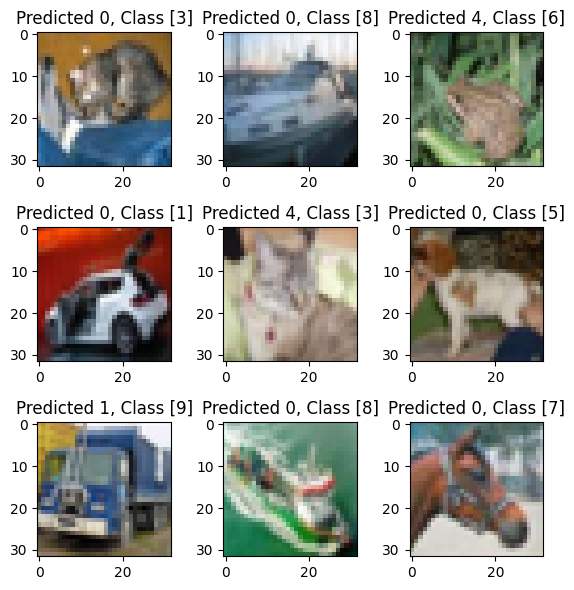

In [18]:
incorrect = np.where(predicted_classes!=test_Y_Flatten)[0]
plt.figure(figsize=(6,6))
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(32,32,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


Similarly, we can determine the number of incorrect predictions by supporting what was said above about the model.

## 3. Convolutional Architecture Design

Design a CNN from scratch, not copied from a tutorial.

You must explicitly define and justify:

- Number of convolutional layers

- Kernel sizes

- Stride and padding choices

- Activation functions

- Pooling strategy (if any)

The architecture should be simple but intentional, not deep for its own sake.

## 3.1 Convolutional Layer

At this point, we will define a **single convolution layer** to see how the model behaves.

The convolution layer seeks to extract the maximum number of features from the images. 

This will allow us to see or help recognize edges or colors. 

Similarly, we will define a size of 3x3 to gradually move through the images.

In [19]:
def convolution_step(image, kernel, bias=0, stride=1, padding=1):
    H, W, C = image.shape
    k_h, k_w, _ = kernel.shape
    
    image_padded = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    
    out_h = int((H - k_h + 2 * padding) / stride) + 1
    out_w = int((W - k_w + 2 * padding) / stride) + 1
    
    feature_map = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            h_start = i * stride
            h_end = h_start + k_h
            w_start = j * stride
            w_end = w_start + k_w
            
            region = image_padded[h_start:h_end, w_start:w_end, :]
            feature_map[i, j] = np.sum(region * kernel) + bias
            
    return feature_map

def conv_layer_forward(image, kernels, biases, stride=1, padding=1):
    num_filters = len(kernels)
    maps = []
    
    for k in range(num_filters):
        f_map = convolution_step(image, kernels[k], biases[k], stride, padding)
        maps.append(f_map)
        
    output_volume = np.stack(maps, axis=-1)
    return output_volume

## 3.2 Activation Functions

In this section we will define activation functions that will have a great impact on achieving classification.

These are ReLu and SoftMax

As we define softmax, its to prevent the value from becoming too large if we had many neurons, so we're going to handle these values between 0 and 1

In [20]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    shifted_x = x - np.max(x)
    exps = np.exp(shifted_x)
    return exps / np.sum(exps)

## 3.3 Pooling

The pooling strategy allow us to highlight the most important features of an image throughout it, moving with respect to the image size that we previously defined **3x3**

In [21]:
def max_pooling(volume, pool_size=2, stride=2):
    H, W, D = volume.shape
    
    out_h = int((H - pool_size) / stride) + 1
    out_w = int((W - pool_size) / stride) + 1
    
    output = np.zeros((out_h, out_w, D))
    
    for d in range(D):
        for i in range(out_h):
            for j in range(out_w):
                h_start = i * stride
                h_end = h_start + pool_size
                w_start = j * stride
                w_end = w_start + pool_size
                
                window = volume[h_start:h_end, w_start:w_end, d]
                output[i, j, d] = np.max(window)
                
    return output

Finally, we have the step prior to classification where we will connect each neuron prior to its respective output.

In [22]:
def dense_forward(inputs, weights, bias):
    flattened_input = inputs.flatten()
    logits = np.dot(flattened_input, weights) + bias
    return logits

## 3.4 Rethinking
After defining the respective layers for the convolutional neural network from scratch, we still need to perform the backpropagation operation. Doing this using only numpy can be quite difficult because the dataset contains **50,000 images** in total, divided into **40,000** for training and **10,000 for testing**.

Therefore, we will use the libraries previously imported at the beginning of this document to simulate the same architecture as described:

- 2 Convolutional Layer

    Having more than one convolutional layer, will improve performance when extracting features, allowing the model to generalize the pattern.

- Kernel size of 3x3

    This value allow us to review each of these in a consistent manner, thus taking advantage of the image's characteristics.

- Strides 

    It is the distance it moves when checking the kernel size, normally it's handled in increments of 2

- Activation function: ReLu and SoftMax

    Softmax will allow us to find the probability of it being the correct label, at the end of the neural network, while relu will allow us to eliminate possible noise from values.

- Pooling Strategy

    This type of strategy will allow the identification of specific patterns that can enhance the model.


In [ ]:
model_scratch = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), 
           padding='same', activation='relu', kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
            padding='same', activation='relu', kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_scratch.summary()

model_scratch.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_scratch = model_scratch.fit(
    train_X_normalize, 
    train_label, 
    epochs=20, 
    batch_size=64, 
    validation_data=(valid_X, valid_label)
)

loss, acc = model_scratch.evaluate(test_X, test_Y_one_hot)
print(f"\nPrecisión en Test: {acc*100:.2f}%")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


2026-02-09 19:53:59.632449: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4538 - loss: 1.5321 - val_accuracy: 0.5672 - val_loss: 1.2508
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6029 - loss: 1.1321 - val_accuracy: 0.6386 - val_loss: 1.0306
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6610 - loss: 0.9740 - val_accuracy: 0.6592 - val_loss: 0.9842
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6960 - loss: 0.8743 - val_accuracy: 0.6798 - val_loss: 0.9277
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7245 - loss: 0.7948 - val_accuracy: 0.6838 - val_loss: 0.9197
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7508 - loss: 0.7222 - val_accuracy: 0.6863 - val_loss: 0.9175
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7704 - loss: 0.6571 - val_accuracy: 0.6835 - val_loss: 0.9322
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7903 - loss: 0.6027 - val_accurac

## 3.5 Conclusions

By obtaining the accuracy and loss, we can compare it to what we previously achieved using only flatten and dense layers.

This allows us to observe and understand the importance of the convolutional layer and its pooling strategy, which first extracts the features and then the more specific details, resulting in improved image prediction for the dataset.

## 4. Controlled Experiments on the Convolutional Layer

Choose one aspect of the convolutional layer and explore it systematically.

Examples (pick one):

- Kernel size (e.g. 3×3 vs 5×5)

- Number of filters

- Depth (1 vs 2 vs 3 conv layers)

- With vs without pooling

- Effect of stride on feature maps

Keep everything else fixed.

Report:

- Quantitative results (accuracy, loss)

- Qualitative observations

- Trade-offs (performance vs complexity)

## 4.1 Changing Kernel Size

Let's change the kernel size to see what happens to its performance

In [26]:
model_scratch_kernel = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), 
           padding='same', activation='relu', kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1),
            padding='same', activation='relu', kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_scratch_kernel.summary()

model_scratch_kernel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_scratch = model_scratch_kernel.fit(
    train_X_normalize, 
    train_label, 
    epochs=20, 
    batch_size=128,
    validation_data=(valid_X, valid_label)
)

loss, acc = model_scratch_kernel.evaluate(test_X, test_Y_one_hot)
print(f"\nPrecisión en Test: {acc*100:.2f}%")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,402 (2.21 MB)

 Trainable params: 579,402 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


2026-02-09 20:09:02.808075: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 491520000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.4194 - loss: 1.6353 - val_accuracy: 0.5405 - val_loss: 1.2875
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.5792 - loss: 1.1936 - val_accuracy: 0.5883 - val_loss: 1.1569
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.6409 - loss: 1.0236 - val_accuracy: 0.6403 - val_loss: 1.0297
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.6817 - loss: 0.9123 - val_accuracy: 0.6571 - val_loss: 0.9896
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.7158 - loss: 0.8089 - val_accuracy: 0.6742 - val_loss: 0.9529
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.7479 - loss: 0.7241 - val_accuracy: 0.6887 - val_loss: 0.9369
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.7767 - loss: 0.6429 - val_accuracy: 0.6884 - val_loss: 0.9322
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.8069 - loss: 0.5605 - val_accur

## Conclusions

If we change an important attribute such as the kernel size, this can allow the selection of general features in the convolutional layer to be faster, but it depends on the image size.

In this case, this dataset has **32x32** images, so having a **5x5 kernel size** can make the image quite **blurry**, and since we have only implemented **one convolutional layer**, we cannot see an improvement in classification.

## 5. Interpretation and Architectural Reasoning

Answers in your own words:

- Why did convolutional layers outperform (or not) the baseline?

Due to feature extraction and the implementation of a pooling strategy that highlights the most relevants pixels, helping the model identify patterns.

- What inductive bias does convolution introduce?

The importance of bias lies in the fact that if, after convolution, the values are close to zero and the activation function ReLu converts them to this value, it's possible to recover image features, such as an edge.

- In what type of problems would convolution not be appropriate?

The types of problems where a convolution layer would not be appropriate are when the geometric shapes of the images are simple.

This will make it easier for the model to see that they have a similar pattern. This could be seen with a datset for classifying numbers where each image is the same size and they are centered, meaning their geometry does not change drastically.




## 6. Deployment in SageMaker

- Train the model in Sagemaker

- Deploy the model to a sagemaker endpoint


In [ ]:
import os
import tensorflow as tf

export_version = '1'
export_path = os.path.join('model_export', export_version)
code_path = os.path.join('model_export', 'code')

os.makedirs(export_path, exist_ok=True)
os.makedirs(code_path, exist_ok=True)

model_scratch.save(export_path)
print(f"Modelo guardado en: {export_path}")

In [ ]:
%%writefile model_export/code/inference.py
import json

def input_handler(data, context):
    if context.request_content_type == 'application/json':
        payload = data.read().decode('utf-8')
        input_data = json.loads(payload)
        if isinstance(input_data, list) and 'instances' not in input_data:
            formatted_input = {"instances": input_data}
        elif isinstance(input_data, dict) and 'instances' not in input_data:
            formatted_input = {"instances": [input_data]}
        else:
            formatted_input = input_data
            
        return json.dumps(formatted_input)
    
    raise ValueError(f"Unsupported content type: {context.request_content_type}")

def output_handler(data, context):
    response_content_type = context.accept_header
    prediction = data.content
    
    
    return prediction, response_content_type

In [ ]:
import tarfile

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=".")

make_tarfile("model.tar.gz", "model_export")
print("Archivo 'model.tar.gz' creado y listo para subir a S3.")

In [ ]:
import sagemaker

try:
    sagemaker_session = sagemaker.Session()
    bucket = sagemaker_session.default_bucket()
    prefix = 'cifar10-model'

    model_artifact = sagemaker_session.upload_data(path='model.tar.gz', bucket=bucket, key_prefix=prefix)
    print(f"✅ Archivo subido a S3 exitosamente: {model_artifact}")
    print(f"👉 Copia esta URL de S3 para crear tu modelo en la consola de SageMaker.")
except Exception as e:
    print(f"No se pudo subir automáticamente a S3 (posiblemente no estás en una instancia de SageMaker): {e}")
    print("Debes descargar 'model.tar.gz' y subirlo manualmente a tu bucket S3.")

## References

* **Telefónica Sala de Comunicación.** (s.f.). *Redes neuronales convolucionales: qué son, tipos y aplicaciones*. [Reference](https://www.telefonica.com/es/sala-comunicacion/blog/redes-neuronales-convolucionales-que-son-tipos-aplicaciones/)
* **Aprende Machine Learning.** (s.f.). *Crear una red neuronal en Python desde cero*. [Reference](https://www.aprendemachinelearning.com/crear-una-red-neuronal-en-python-desde-cero/)
* **Cleverpy.** (s.f.). *Red Convolucional con PyTorch*. [Reference](https://cleverpy.com/red-convolucional-pytorch/)
* **Stanford University.** (s.f.). *CS231n: Convolutional Neural Networks for Visual Recognition*. [Reference](https://cs231n.github.io/convolutional-networks/)
* **Carnegie Mellon University.** (2021). *CNN Backpropagation - Recitation 5*. Deep Learning 11-785. [Reference PDF](https://deeplearning.cs.cmu.edu/F21/document/recitation/Recitation5/CNN_Backprop_Recitation_5_F21.pdf)
* **Material del Curso.** (2024). *Neural Network Package*.